# Análise de Ecommerce

####             Uma loja de roupas possui um serviço de aconselhamento sobre os estilos das roupas. Os clientes entram na loja, tem uma reunião um com um personal stylist e podem ir para casa pedir as roupas pelo aplicativo ou pelo site da loja.


#### O objetivo desta análise é observar em qual plataforma deve concentrar seus esforços, no aplicativo mobile ou no website.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.DataFrame(pd.read_csv('Ecommerce Customers.csv'))

##### Ao obter o Dataset, conseguimos obter a tabela com as seguintes colunas:
###### Email: email dos clientes
###### Addres: Endereço de cada cliente da loja
###### Avatar : Nome do Avatar do Cliente
###### Avg. Session Length: Tempo médio de cada reunião com personal stylist
###### Time on App: Tempo gasto no Aplicativo
###### Time on Website: Tempo no Website
###### Length of Membership : Tempo de Membresia na Loja 
###### Yearly Amount Spent: Gastos Anuais do Cliente

In [4]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
dataset.shape

(500, 8)

###### Ao analisar a tabela abaixo com alguns detalhes estatísticos, podemos ver que a media e a mediana das variáveis 'Length of Membership' , 'Time on Website	'  e  'Time on App',   possuem valores muito próximos, o que pode ser um indício de que exista uma distribuição normal destas quantidades.

In [7]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


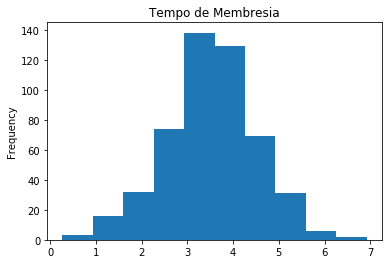

In [19]:
dataset['Length of Membership'].plot(kind = 'hist', title = 'Tempo de Membresia')


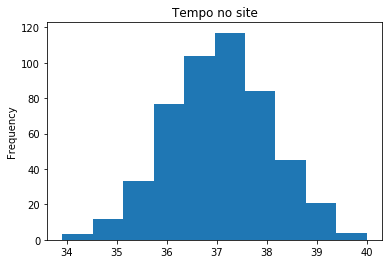

In [20]:
dataset['Time on Website'].plot(kind = "hist", title = "Tempo no site")


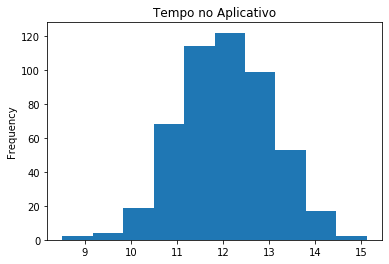

In [21]:
dataset['Time on App'].plot(kind = "hist", title = 'Tempo no Aplicativo')

#####  Vamos analisar o coeficiente de correlação de Pearson entre as variáveis no dataset.

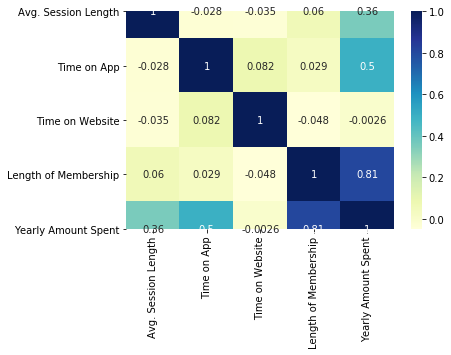

In [27]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)

##### Conseguimos ver  que a Quantia Gasta Anualmente tem uma correlação muito mais significativa com Tempo dos usuários no aplicativo (0.5) do que com Tempo dos usuários no site (0.0026).

###### Com isso, iremos investigar como as variáveis "Time on App" e "Time on Website" se comportam através de uma regressão linear múltipla que possui "Yearly Amount Spent" como variável dependente e "Time on App", "Time on Website", "Length of Membership" e "Avg. Session Length" como variáveis independentes.

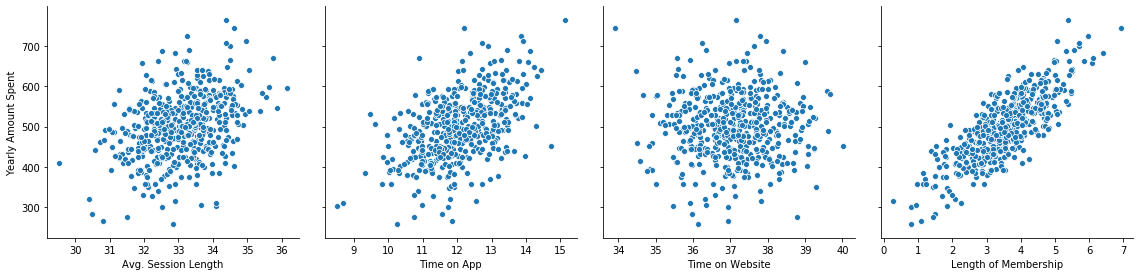

In [43]:
sns.pairplot(dataset, x_vars = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'], y_vars =  'Yearly Amount Spent', height=4, aspect=1, kind='scatter')


###### Implementando a regressão linear múltipla e verificando a dispersão do erro em função dos valores da base de teste do modelo, conseguimos verificar que o erro se mantém estável à medida que os valores da base de treino aumenta, o que indica que a regressão linear é um modelo cabível para esta análise.

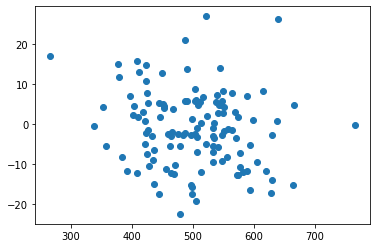

In [65]:
y = dataset['Yearly Amount Spent']
x = dataset[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.25)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xtrain, Ytrain)

Ypred = regressor.predict(Xtest)
error = Ypred - Ytest

plt.scatter(Ytest, error)

###### Podemos ver também que os valores de erro obtidos se distribuem normalmente.

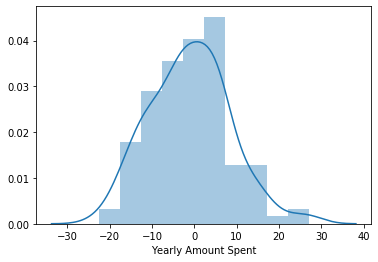

In [70]:
sns.distplot(error)

###### Analisando os coeficientes da regressão linear múltipla, temos que a variável 'Time on App' exerce influência significativa nos resultado da quantia gasta anualmente (+38.63201791 para cada unidade de tempo), enquanto isso a variável "Time On Website" exerce influência quase desprezível na quantia gasta anualmente  (+0.6735767 para cada unidade de tempo).

In [66]:
regressor.coef_

array([25.67885995, 38.63201791,  0.6735767 , 61.53986509])